### Classification of benign and malignant breast cancer cells

### Data Preparation
#### Data Source: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/wdbc.data', header=None)
df.drop(df.columns[[0]], axis=1, inplace=True)

#train-test split
train, test = train_test_split(df, test_size = 0.2, random_state=1)

#Selecting feature and target variables
X_train = train.iloc[:, 1:32].to_numpy()
Y_train = train.iloc[:, 0].to_numpy()

X_test = test.iloc[:, 1:32].to_numpy()
Y_test = test.iloc[:, 0].to_numpy()

print(len(df))

569


### Logistic Regression with Feature Standardization

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(StandardScaler(), LogisticRegression())
pipeline.fit(X_train, Y_train)

print("True Sample: ", Y_test[0])
print("Sample Prediction: ", pipeline.predict(X_test[0].reshape(1, -1)) )
print("Mean Accuracy: ", pipeline.score(X_test, Y_test))

True Sample:  B
Sample Prediction:  ['B']
Mean Accuracy:  0.9736842105263158


              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



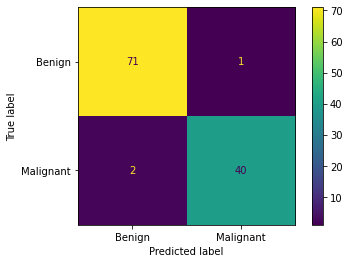

In [37]:
from sklearn.metrics import classification_report, plot_confusion_matrix

predictions = pipeline.predict(X_test)
plot_confusion_matrix(pipeline, X_test, Y_test, display_labels=['Benign', 'Malignant'])
print(classification_report(Y_test, predictions, target_names=['Benign', 'Malignant']))

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()


X_vals = df.iloc[:, 1:32].to_numpy()
Y_vals = df.iloc[:, 0].to_numpy()
Y_binarized = lb.fit_transform(Y_vals)

cross_val = cross_val_score(pipeline, X_vals, Y_binarized, cv=5, scoring= 'f1')

print("Cross-validated F1 scores :", cross_val)
print("Mean Cross-validated F1 score :", cross_val.mean())

Cross-validated F1 scores : [0.97674419 0.97619048 0.96296296 0.96385542 0.98823529]
Mean Cross-validated F1 score : 0.9735976682008689


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
log_model = make_pipeline(StandardScaler(), LogisticRegression())
clf = GridSearchCV(log_model, param_grid=parameters, scoring='accuracy', cv=5)
clf.fit(X_train, Y_train)
print("Best parameters for logistic regression model :", clf.best_params_)
print("Accuracy :",clf.best_score_)

AttributeError: 'Pipeline' object has no attribute 'best_params_'